# **AdvStat4PhysAna - RLab 2**

**Barone Francesco Pio**, student ID: 2058478

31 march 2022

In [1]:
# general requirements
library(GoFKernel)  # to invert a function

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



<a id='exr1'></a>
## **EXR01** - contaminant in tap water

In [2]:
x  <- c(15.58, 15.9,   16, 16.1, 16.2)
p1 <- c( 0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c( 0.14, 0.05, 0.64, 0.08, 0.09)

$$E[x] = \sum_i x_i p(x_i)$$
$$ Var(x) = E[x^2] - E[x]$$

In [3]:
E_p1 <- sum(x*p1)
E_p2 <- sum(x*p2)

var_p1 <- sum(x*x*p1) - E_p1**2
var_p2 <- sum(x*x*p2) - E_p2**2

In [4]:
cat('Method 1: E[x] =', E_p1, ', Var(x) =', var_p1, '\n')
cat('Method 2: E[x] =', E_p2, ', Var(x) =', var_p2)

Method 1: E[x] = 15.959 , Var(x) = 0.033979 
Method 2: E[x] = 15.9622 , Var(x) = 0.02816716

<a id='exr2'></a>
## **EXR02** - waiting time at the doctor

In [5]:
lambda <- 1/30  # in minutes

**2.1 |**  Simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

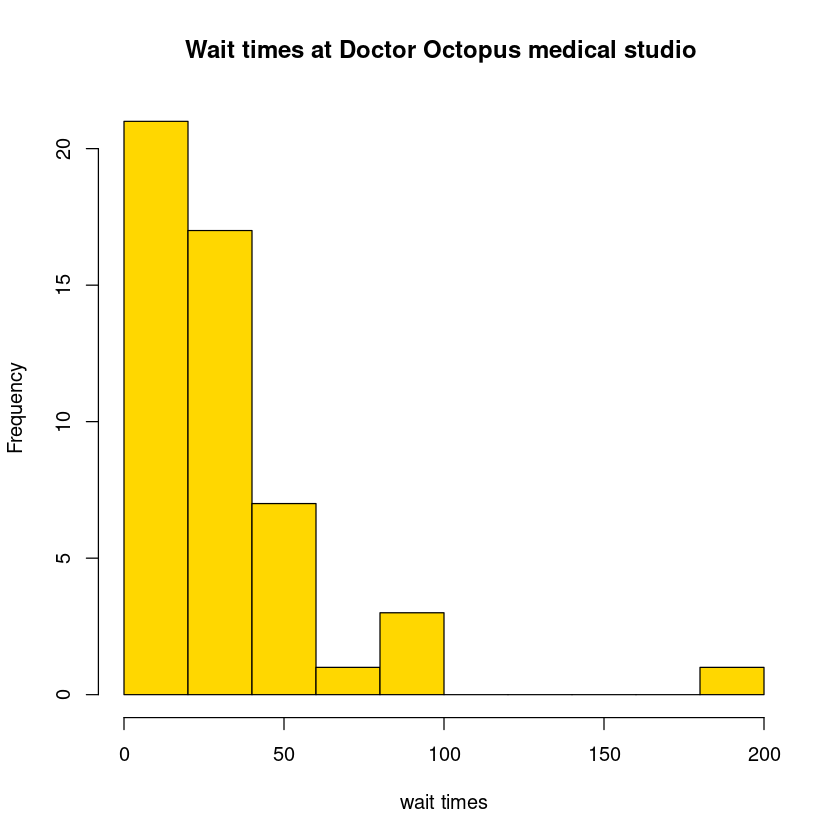

In [6]:
wait_times <- rexp(50, lambda)

hist( wait_times, col='gold', xlab = 'wait times',
      main=paste('Wait times at Doctor Octopus medical studio ') )

**2.2 |** What is the probability that a person will wait for less than 10 minutes ?

In [7]:
pexp(10, lambda)  # use the cumulative distribution function

[1] 0.2834687

**2.3 |** evaluate the average waiting time from the simulated data and compare it with
the expected value (calculated from theory and by manipulating the probability
distributions using R)

In [8]:
e_simulated <- mean(wait_times)
e_theory <- 1/lambda

cat('from simulation: ', e_simulated, '\n')
cat('from theory: ', e_theory)

from simulation:  31.93736 
from theory:  30

**2.4 |** what is the probability for waiting more than one hour before being received?

In [9]:
1 - pexp(60, lambda)

[1] 0.1353353

<a id='exr3'></a>
## **EXR03** - typo in book

Let’s suppose that on a book, on average, there is one typo error every three pages.
If the number of errors follows a Poisson distribution, plot the pdf and cdf, and
calculate the probability that there is at least one error on a specific page of the
book.

$$Poi(r|\lambda) = \frac{\lambda^r}{r!}e^{-\lambda}$$

Where

$r$ is intensity of the process (number of events per unit time)

$\lambda$ is the average number of events per unit time

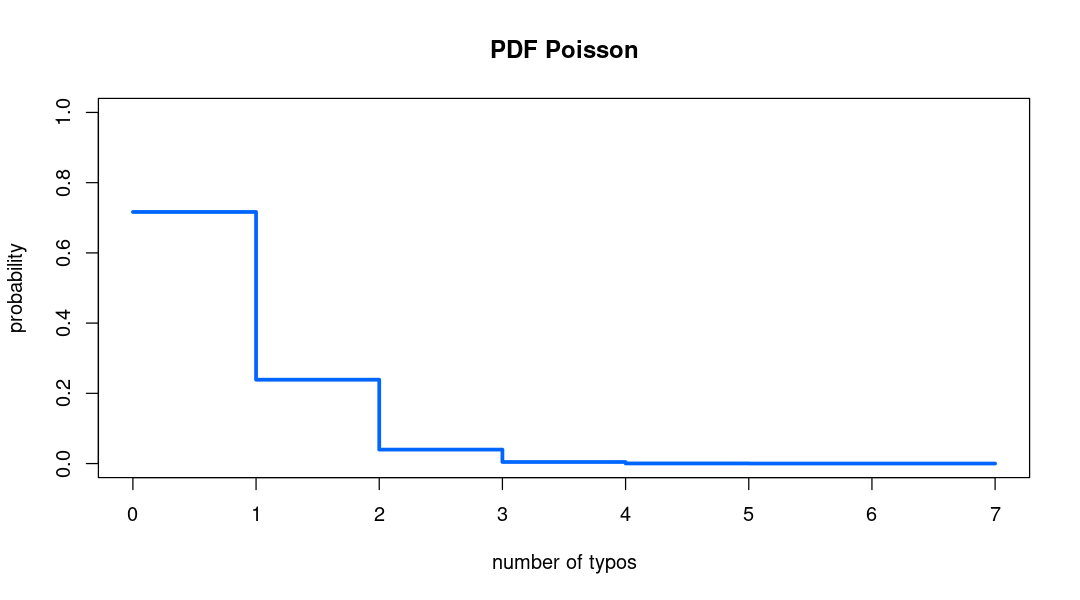

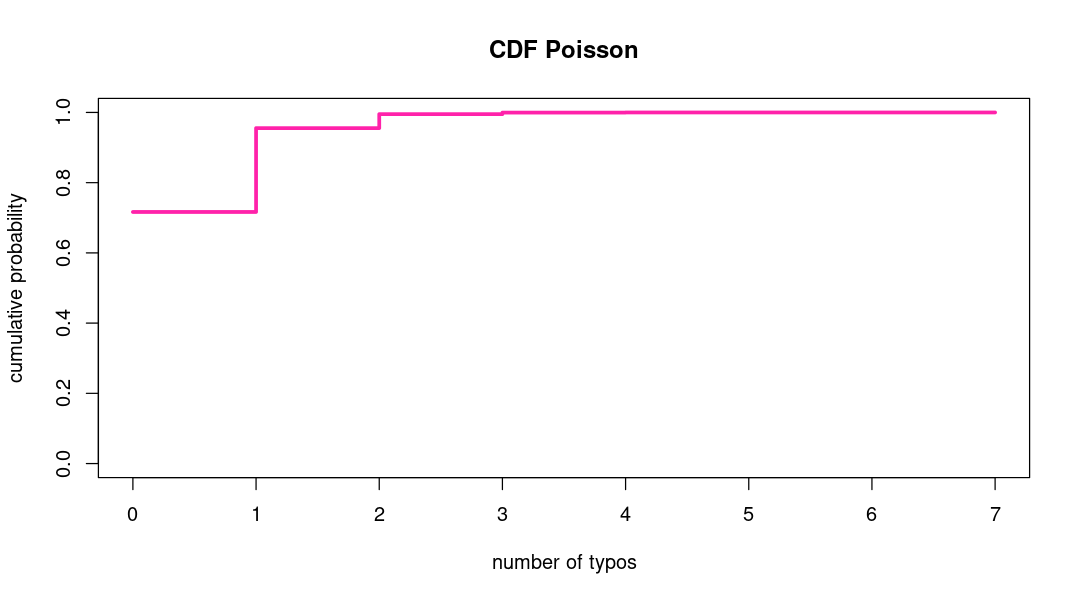

In [10]:
lambda <- 1/3  # one every 3 pages
x <- seq(0, 7)

pdff <- dpois(x, lambda) # probability density function
cdff <- ppois(x, lambda) #  cumulative density function 

options(repr.plot.width=9, repr.plot.height=5)
plot(x, pdff, type="s",  lwd=3, col="#0066FF", main='PDF Poisson',
     xlab="number of typos", ylab="probability", ylim = c(0,1))
plot(x, cdff, type="s",  lwd=3, col="#FF22AA", main='CDF Poisson',
     xlab="number of typos", ylab="cumulative probability", ylim = c(0,1))

In [11]:
prob <- 1 - ppois(0, lambda)
cat('The probability that a page contains at least one error is', prob )

The probability that a page contains at least one error is 0.2834687

<a id='exr4'></a>
## **EXR04** - draw randomly 

We randomly draw cards from a deck of 52 cards, with replacement, until one ace is
drawn. Calculate the probability that at least 10 draws are needed.

The probability of obtaining *the first ace* in *exactly* $n=10$ trials, is given by the Negative Binomial distribution.

In [12]:
n <- 10   # number of trials
r <- 1    # number of successes
p <- 4/52 # probability of event: 4 aces in 52 cards
prob <- dnbinom(x = n-r, size = r, prob = p)

cat(paste('probability of first success at', n, 'th trial:', prob))

probability of first success at 10 th trial: 0.0374280922618219

To get the probability that **at least** 10 draws are needed, we have to sum the probabilities from 10 to infinity. Otherwise, we could simply do $1 - P(x<10)$.

In [13]:
# method 1: using the cumulative distribution function
1 - pnbinom(n-r-1, r, p)  # 1 - P(first success within 9 trials)

[1] 0.4865652

In [14]:
# method 2:   sum  10,11,12,... draws  for first success
su <- 0
for(n in 10:1000)
    { su <- su + dnbinom(x = n-r, 1, p) }
su

[1] 0.4865652

<a id='exr5'></a>
## **EXR05** - TOLC-I

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form
$$ f(X) = c(t − 1)(2 − t) \;\;\; \text{for} \;\;\; 1 < t < 2 \;,$$ $f(X)=0$ otherwise, where $t$ is the time in hours.

**5.1 |** using the $integrate()$ R function, determine the constant $c$ (and verify it analytically)

In [15]:
f <- function(t, c=1) {  (1<t & t<2)*( c*(t-1)*(2-t)) + 0  }

norm_integral <- integrate(f, lower = 1, upper = 2)
c_norm <- 1/norm_integral$value

cat( paste('Normalization coefficient: c =',c_norm) )

Normalization coefficient: c = 6

Theoretically 

$$ \int_1^2 3t - t^2 -2 = \left[\frac{3}{2}t^2 -\frac{t^3}{3} -2t\right]_1^2 = 6 - \frac{8}{3} - 4 - \frac{3}{2} + \frac{1}{3} + 2 = \frac{24-16+2-9}{6} = 1/6$$
$$ \Rightarrow c = 6$$

**5.2 |** write the set of four R functions and plot the pdf and cdf, respectively

In [16]:
# pdf
dtolc <- function(t, c=6) {  (1<t & t<2)*( c*(t-1)*(2-t)) + 0  }
# cdf
ptolc <- function(t, c=6)
   { (1<t & t<2)*(((3*(t^2)/2)-((t^3)/3)-(2*t))*6 + 5) + (t>=2)*1 + 0 }

# note that the expressions above function as vectorial expression!

# quantile
qtolc <- inverse(ptolc,lower=1,upper=2)
# random
rtolc <- function(t) { qtolc(runif(t)) }

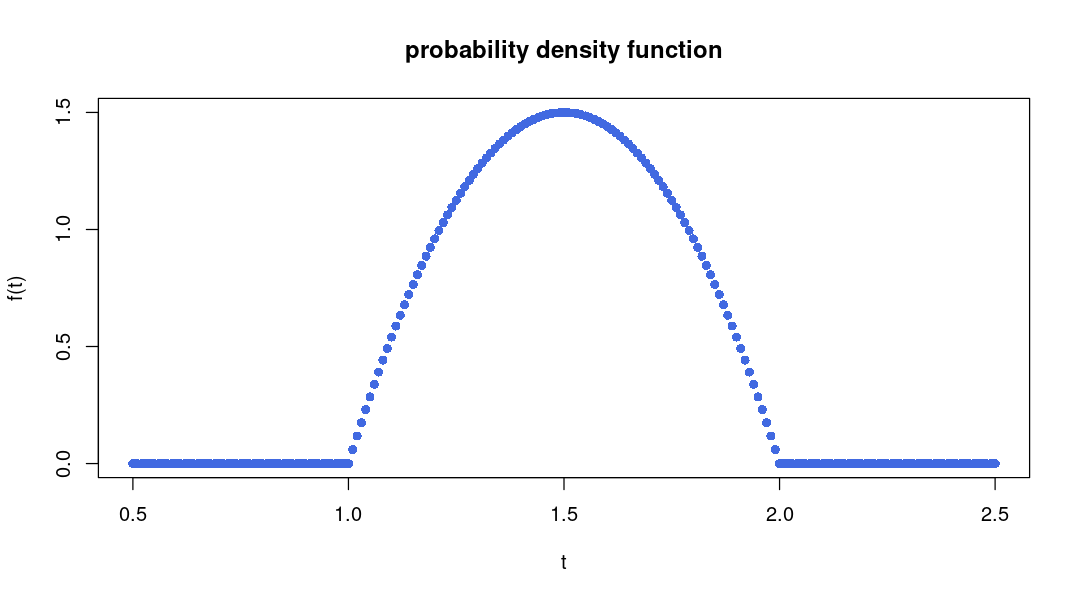

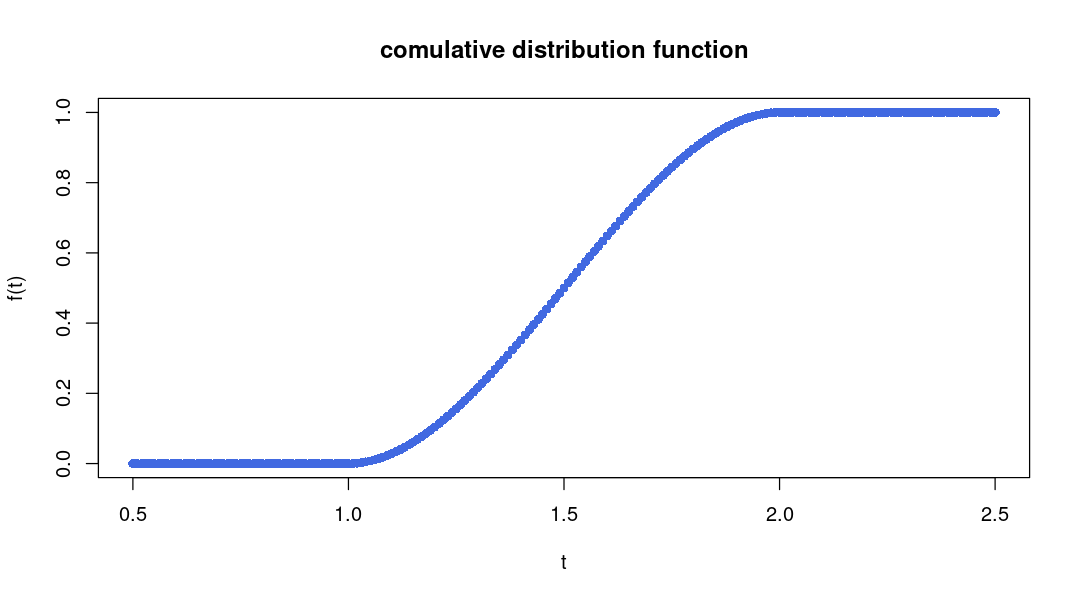

In [17]:
xx <- seq(0.5,2.5,0.01)

plot( xx, dtolc(xx), col = "royalblue", pch=16,
    xlab="t", ylab="f(t)", main = 'probability density function')

plot( xx, ptolc(xx), col = "royalblue", pch=16,
    xlab="t", ylab="f(t)", main = 'comulative distribution function')

**5.3 |** Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes.

In [18]:
p_more75min <- integrate(dtolc, lower = 1.25, upper = 2)$value

# maybe you mean BETWEEN 90 and 120 minutes?
p_90_120min <- integrate(dtolc, lower = 1.5, upper = 2)$value

cat('probability for 75 or more minutes:', p_more75min, '\n')
cat('probability for 90 to 120 minutes:', p_90_120min, '\n')

probability for 75 or more minutes: 0.84375 
probability for 90 to 120 minutes: 0.5 


<a id='exr4'></a>
## **EXR06** - lifetime of used tires

The lifetime of tires sold by an used tires shop is $10^4\cdot x \cdot km$, where $x$ is a random variable following the distribution function
$$ f(X) = 2/x^2 \;\;\; \text{for} \;\;\; 1 < x < 2 \;,$$ $f(X)=0$ otherwise.

**6.1 |** write the set of four R functions and plot the pdf and cdf, respectively

In [19]:
# pdf
dtires <- function(x)
    { (1<x & x<2)*( 2/(x^2) ) + 0  }
# cdf
ptires <- function(x)
    { (1<x & x<2)*( -2/x + 2 ) + (x>=2)*1 + 0 }

# quantile
qtires <- Vectorize(inverse(ptires, lower=1, upper=2))
  # note: I added Vectorize to make the function callable with an input array of values

# random
rtires <- function(t) { qtires(runif(t)) }

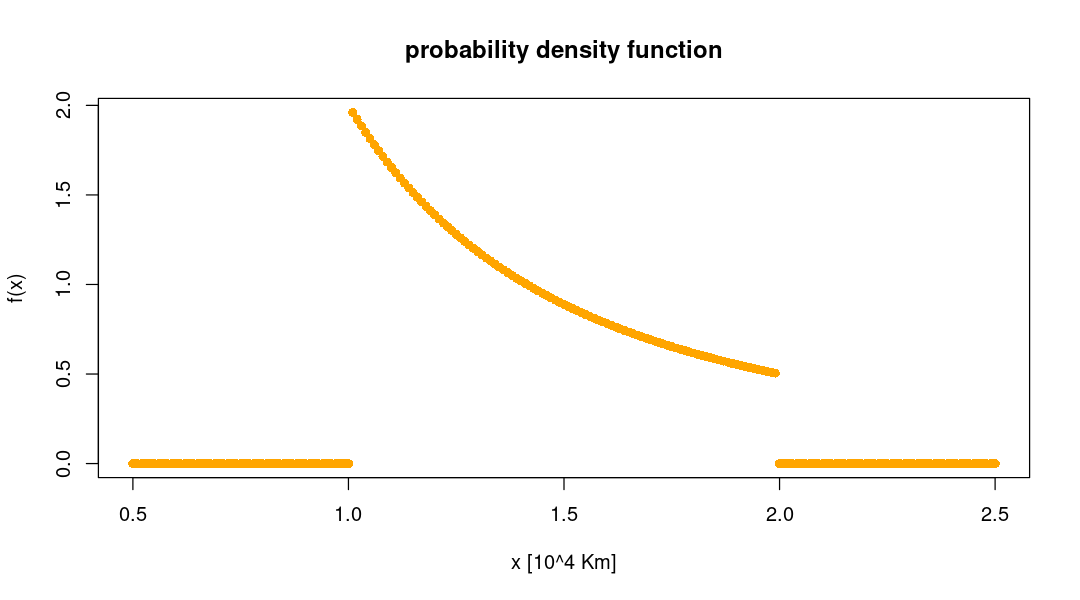

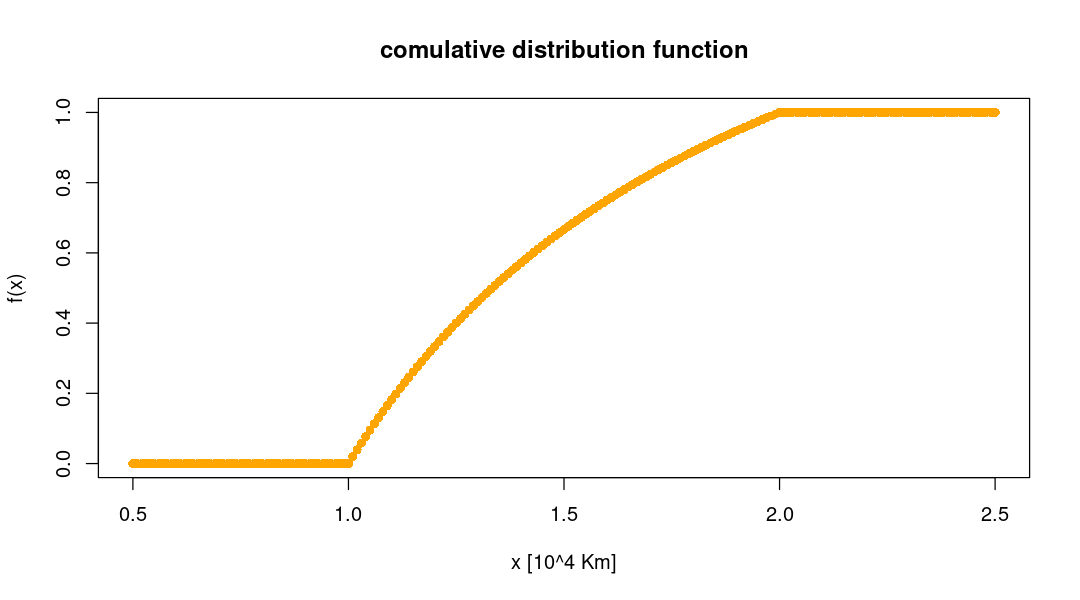

In [20]:
xx <- seq(0.5,2.5,0.01)

plot( xx, dtires(xx), col = "orange", pch=16,
    xlab="x [10^4 Km]", ylab="f(x)", main = 'probability density function')

plot( xx, ptires(xx), col = "orange", pch=16,
    xlab="x [10^4 Km]", ylab="f(x)", main = 'comulative distribution function')

**6.2 |** determine the probability that tires will last less than 15000 km

In [21]:
ptires(1.5)  # using cdf

[1] 0.6666667

**6.3 |** sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression $Var(X) = E[X^2] - E[X]^2$

In [22]:
samples <- rtires(3000)

cat('mean =', mean(samples), '\n')
cat('Var =', mean(samples^2)- mean(samples)^2, '\n')

mean = 1.39322 
Var = 0.08117507 


End of file.